# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [93]:
!pip install requests
!pip install beautifulsoup
!pip install pandas
!pip install matplotlib
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup
import pandas as pd



  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\rodri\AppData\Local\Temp\pip-install-dxd5zvqp\beautifulsoup_0c4da3404ecb4212a5b35362f407dbdf\setup.py", line 3
          "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                         ^^
      SyntaxError: invalid syntax
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an is


  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/95/b6/9a5133deb5838c4dbe3ea27e8dba123622aa5112d43a079e9587636b4faf/fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ------- ----------------------------- 30.7/154.1 kB 640.0 kB/s eta 0:00:01
     ----------------------------------

In [94]:
# URL de la página a scrapear
busqueda="Termos Stanley"

r = requests.get('https://listado.mercadolibre.com.ar/{}#D[A:{}]'.format(busqueda.replace(' ','-'),busqueda))

contenido = r.content
soup = BeautifulSoup(contenido, 'html.parser')
soup


<!DOCTYPE html>

<html lang="es-AR">
<head><link href="https://www.google-analytics.com" rel="preconnect"/><link href="https://www.google.com" rel="preconnect"/><link href="https://data.mercadolibre.com" rel="preconnect"/><link href="https://http2.mlstatic.com" rel="preconnect"/><link href="https://stats.g.doubleclick.net" rel="preconnect"/><link href="https://analytics.mercadolibre.com.ar" rel="preconnect"/><link href="https://analytics.mercadolibre.com" rel="preconnect"/><link href="https://www.google.com.ar" rel="preconnect"/><script nonce="Q1YzeFQdqQhoTxj3iFJmAQ==" type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":490.712212,"transactionName":"YlZQYEVZC0QEV0BZV1scd0xHSgBEFl5HH39wZx0bHQ==","queueTime":0,"ttGuid":"99ee20372e13d287"}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},aj

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [95]:
alldivs = soup.find_all('div',{ 'class':'andes-card'})
#Array donde estarán los productos
productos_array = []
#Extraigo los datos de cada producto y los guardo
for item in alldivs:
    data={}
    data['Nombre']=item.find('h2',{'class':'ui-search-item__title'}).text
    precio_symbol = item.find('span', {'class': 'andes-money-amount__currency-symbol'}).text
    precio_fraction = item.find('span', {'class': 'andes-money-amount__fraction'}).text
    data['Precio'] = f'{precio_symbol}{precio_fraction}'
    
    productos_array.append(data)
    print(data)
    #Creamos el dataframe con los datos extraidos
    productos_df = pd.DataFrame(productos_array)
    

{'Nombre': 'Termo Stanley Clásico 1.4 LTS Asa Plegable de acero inoxidable', 'Precio': '$35.000'}
{'Nombre': 'Stanley Termo Clásico 1.4 LTS Asa Plegable de acero inoxidable rojo', 'Precio': '$33.000'}
{'Nombre': 'Stanley Termo Clásico 1.4 LTS Asa Plegable de acero inoxidable negro', 'Precio': '$36.000'}
{'Nombre': 'Termo Stanley 950ml Manija Pico Cebador Original Verde', 'Precio': '$44.217'}
{'Nombre': 'Stanley Termo Clásico 1 L de acero inoxidable hammertone green', 'Precio': '$41.899'}
{'Nombre': 'Termo Stanley Vacuum Bottle Blanco 1lt Ed Limit Pico Cebador', 'Precio': '$32.000'}
{'Nombre': 'Stanley Classic Vacuum Bottle 1.1 QT - 1 L - Hammertone green', 'Precio': '$41.509'}
{'Nombre': 'Termo Stanley Adventure 1 L Acero Inoxidable Tapon Cebador', 'Precio': '$31.000'}
{'Nombre': 'Termo Stanley Clásico 1,4 Lts Rosa Con Tapón Cebador', 'Precio': '$48.503'}
{'Nombre': 'Stanley Termo Adventure X 500 Ml Polar', 'Precio': '$45.100'}
{'Nombre': 'Termo Stanley 950ml Manija Pico Cebador', 'Pre

In [105]:
productos_df

,Nombre,Precio
0,Termo Stanley Clásico 1.4 LTS Asa Plegable de ...,35.000
1,Stanley Termo Clásico 1.4 LTS Asa Plegable de ...,33.000
2,Stanley Termo Clásico 1.4 LTS Asa Plegable de ...,36.000
3,Termo Stanley 950ml Manija Pico Cebador Origin...,44.217
4,Stanley Termo Clásico 1 L de acero inoxidable ...,41.899
5,Termo Stanley Vacuum Bottle Blanco 1lt Ed Limi...,32.000
6,Stanley Classic Vacuum Bottle 1.1 QT - 1 L - H...,41.509
7,Termo Stanley Adventure 1 L Acero Inoxidable T...,31.000
8,"Termo Stanley Clásico 1,4 Lts Rosa Con Tapón C...",48.503
9,Stanley Termo Adventure X 500 Ml Polar,45.100


In [106]:
# Calcular el precio promedio
precio_promedio = productos_df['Precio'].mean()

# Calcular el precio mínimo
precio_minimo = productos_df['Precio'].min()

# Calcular el precio máximo
precio_maximo = productos_df['Precio'].max()

print(f'Precio Promedio: {precio_promedio}')
print(f'Precio Mínimo: {precio_minimo}')
print(f'Precio Máximo: {precio_maximo}')


#No quedan bien los números, no se que me estoy perdiendo. REVISAR





Precio Promedio: 48.31932
Precio Mínimo: 31.0
Precio Máximo: 66.279


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

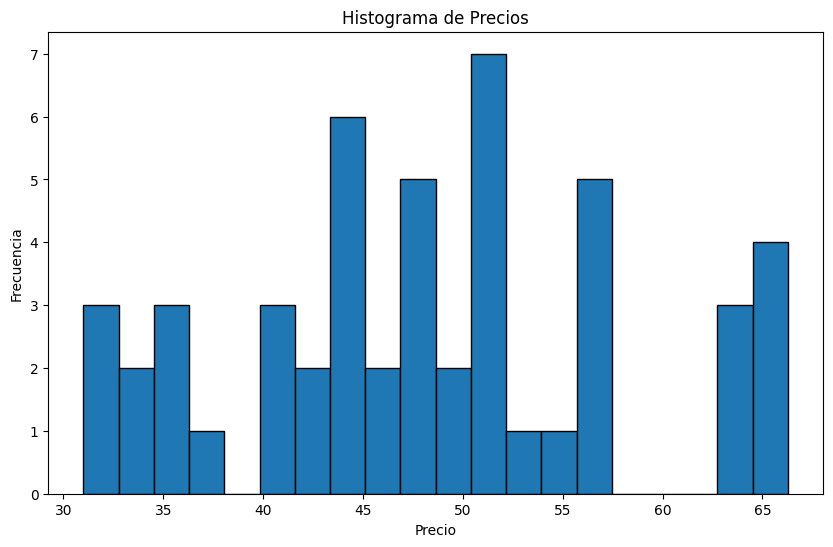

Valores atípicos:
Empty DataFrame
Columns: [Nombre, Precio]
Index: []


In [111]:
# Eliminar caracteres no numéricos y convertir la columna 'Precio' a tipo float
productos_df['Precio'] = productos_df['Precio'].astype(str).replace('[^\d.]', '', regex=True).astype(float)
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(productos_df['Precio'], bins=20, edgecolor='k')  # Ajusta el número de bins según tus necesidades

# Agregar etiquetas y título al gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el histograma
plt.show()

# Detectar y mostrar valores atípicos (Outliers)
Q1 = productos_df['Precio'].quantile(0.25)
Q3 = productos_df['Precio'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = productos_df[(productos_df['Precio'] < lower_bound) | (productos_df['Precio'] > upper_bound)]
print('Valores atípicos:')
print(outliers)

#Los precios me quedan raros, no se que onda. REVISAR